  # Исследование закономерностей, влияющих на успешность игр


**Введение:**
________________________________________________________________________________________________________________________________    
Перед нами данные по продажам игр с 1980 по 2016 годы. Задача: на основе этих данных исследовать и выявить закономерности, влияющие на успешность игр, что, в свою очередь, поможет нам сделать ставку на потенциально успешный продукт и спланировать рекламную кампанию. А в более долгой перспективе отработь принцип работы с подобными данными для будущих прогнозов.

 


**План работы:**
________________________________________________________________________________________________________________________________    
1. Откроем датасет, посмотрим столбцы и их тип, опишем в выводе, какие основные типы данных представлены в датасете, а также        заметны ли пропуски в датасете.


2. Первично предобработаем столбцы: приведем названия столбцов к единому удобному виду, изучим каждый столбец на предмет   пропусков, неуместных значений, неподходящих типов. Опишем найденные аномалии, причины их возникновения, метод их исправления, присвоим финальный тип данных с аргументацией. Напишем краткий вывод про каждый столбец. 


3. Удалим лишние строки, если есть такая необходимость. Сбросим индексы.


4. Заполним пропуски.


5. Добавим новые признаки в таблицу. Добавим столбец `total_sales` с общими продажами по всем регионам.


6. Проведем исследовательский анализ данных:

    - Выясним количество выпущенных игр по годам, выделим период с важными данными.    
    - Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Выясним за какой характерный срок появляются новые и исчезают старые платформы, найдет время достижения пиковых продаж с момента релиза платформы?    
    - Выявим актуальный период на основе выводов из предыдущего анализа. Будем использовать данный актуальный период для построения прогноза на 2017 год.    
    - Найдем платформы-лидеры. Проанализируем их параметры и поведение во времени.    
    - Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.   
    - Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.    
    - Соотнесем выводы с продажами игр на других платформах.    
    - Посмотрим на общее распределение игр по жанрам. Проанализируем самые прибыльные жанры. Ответим на вопрос: Выделяются ли жанры с высокими и низкими продажами?    
    - Составим портрет пользователя каждого региона, определив для пользователя каждого региона (NA, EU, JP): 
    
        - Самые популярные платформы (топ-5). Опишем различия в долях продаж.        
        - Самые популярные жанры (топ-5). Поясним разницу.        
        - Ответим на вопрос: Влияет ли рейтинг ESRB на продажи в отдельном регионе?
        
    
7. Проведем статистический анализ данных, ответив на две гипотезы:

    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.    
    - Средние пользовательские рейтинги жанров Action  и Sports разные.
    
    
8. Поясним как мы сформулировали нулевую и альтернативную гипотезы и какой критерий применили для проверки гипотез и почему.


9. Напишем итоговый вывод по проведенному анализу.
    

## Знакомство с данными.

In [144]:
#Импортируем необходимые библтотеки.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#Загружаем и выводим на экран датасет как для локальной работы, так и для работы на платформе Практикума.
try:
    df = pd.read_csv('...games.csv')
except:
    df = pd.read_csv('.../datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


 ### <span style="color: blue">Вывод по первичному знакомству с данными:
________________________________________________________________________________________________________________________________ 
В представленном датасете 11 столбцов. Из которых пять имеют тип `object`, а шесть тип `float64`. Столбец `User_Score` стоит привести к типу `float32`, поскольку он по смыслу своих значений совпадает со столбцом `Critic_Score` и содержит числовую оценку с рейтингом игры, а поскольку в данном значении у нас лишь одно число после запятой, то для экономии памяти будем менять на `float32`.
    
Столбец `Year_of_Release` стоит привести к типу `int32`, поскольку он содержит в себе только год выхода игры (целое четырехзначное число).
    
    
В представленном датасете изначально всего 16715 строк. В пяти столбцах: `Platform`, `NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`) все строки полные; в двух колонках `Name`, `Genre` имеется по два пропуска. Далее незначительное число пропусков в столбце `Year_of_Release`. В столбцах `Critic_Score`, `User_Score`, `Rating` самое большое число пропусков, их мы будем рассматривать максимально внимательно! Столбцы с категоральными переменными проверим на дубликаты.
________________________________________________________________________________________________________________________________

## Предобработка данных.

In [4]:
#Приведем название всех столбцов к нижнему регистру.
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка столбца `user_score`

In [5]:
#Считаем количество уникальных значений в столбце.
print(len(df['user_score'].unique()))
#Выводим все уникальные значения столбца.
df['user_score'].unique()

97


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<span style="color: blue">В столбце `user_score` 97 уникальных значений с оценками, пропусками `nan` и значениями `tbd`, что можно перевести, как "будут заполнены позже" или "неопределено". Необходимо привести значения `tbd` к `nan`, а затем заполнить все пропуски нашим числовым значением (-999) и привести столбец к типу `float32`. Число `-999` выберем по причине того, что у нас в столбце только положительные числа, данное число ТОЧНО не будет нам мешать в будущем при задачи различных условий в данном столбце при анализе данных.

In [6]:
#Заменяем 'tbd' на 'nan'.
df['user_score'] = df['user_score'].replace('tbd', np.nan)
#Считаем количество уникальных значений и выводим их, 
#чтобы сравнить с предыдущим и убедиться в замене 'tbd'.
print(len(df['user_score'].unique()))
df['user_score'].unique()

96


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [7]:
df['user_score'] = df['user_score'].fillna(-999)
df['user_score'].unique()

array(['8', -999, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [8]:
df['user_score'] = df['user_score'].astype('float32')
df['user_score'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16715 entries, 0 to 16714
Series name: user_score
Non-Null Count  Dtype  
--------------  -----  
16715 non-null  float32
dtypes: float32(1)
memory usage: 65.4 KB


### Обработка столбца `year_of_release`

In [9]:
display(len(df['year_of_release'].unique()))
display(df['year_of_release'].unique())
display(df['year_of_release'].isna().sum())
df['year_of_release'].value_counts()

38

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

269

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

<span style="color: blue">В столбце `year_of_release` 38 уникальных значений - представлены годы выхода игр с 1980 по 2016, то есть у нас данные по продажам за 37 лет. По количеству выпущенных игр по годам наблюдается существпенный рост с 1994 года (двухкратное увеличение по сравнению с предыдущим годом). Также наблюдается 269 пропусков с которыми можно поступить двумя способами: 

<span style="color: blue">1.Попытаться загуглить по названию все игры без года и ввести год вручную. Данный вариант вполне уместный при наличии человеческих ресурсов в магазине "Стримчик", но поскольку мы всего лишь маленькое ИП и не обладаем значительными кадрами, то откажемся от данного метода.
    
<span style="color: blue">2.Удалить строки с пропусками, поскольку их общее количество составляет менее 2% от общего числа данных и удаление этих строк не исказит наши данные. Так и поступим!
Далее привем все данные в этом столбце к типу `int32`, поскольку нам интересен только год (целое четырехзначное число) и в целях экономии памяти.


In [10]:
#Удаляем пропуски в столбце 'year_of_release'.
df = df.dropna(subset=['year_of_release'])
#Сбрасываем индексы после удаления.
df = df.reset_index(drop=True)
#Прроверяем количество пропусков после их удаления.
df['year_of_release'].isna().sum()

0

In [11]:
#Приводим данные в столбце 'year_of_release' к типу 'int32'.
df['year_of_release'] = df['year_of_release'].astype('int32')
#Проверяем тип данных в столбце.
df['year_of_release'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16446 entries, 0 to 16445
Series name: year_of_release
Non-Null Count  Dtype
--------------  -----
16446 non-null  int32
dtypes: int32(1)
memory usage: 64.4 KB


### Обработка столбцов `name` и `genre`

In [12]:
#Проверка на пропуски столбца 'name'.
display(df['name'].isna().sum())
#Удаление и сброс индексов в столбце 'name'.
df = df.dropna(subset=['name'])
df = df.reset_index(drop=True)
#Проверка после удаления пропусков на их наличие в столбце 'name'.
df['name'].isna().sum()

2

0

In [13]:
#Проверка на пропуски столбца 'genre'.
display(df['genre'].isna().sum())


0

<span style="color: blue">Похоже пропуски в столбцах `name` и `genre` были в одних и тех же строках. Поэтому после удаления пустых строк в столбце `name` удалились пустые строки и в столбце `genre`, что доставляет нам только положительные эмоции, ведь больше данных - точнее результаты! Далее проверим на дубликаты данные столбцы. Скорее всего это получится сделать со столбцом `genre`, там будет немного уникальных значений, а вот в столбце `name` большинство значений ожидаются уникальными, но не все, ведь возможна такая ситуация, что игры могут иметь одинаковое название, но быть выпущенными под одним названием на разных платформах!

In [14]:
#Считаем количество уникальных значений.
display(len(df['genre'].unique()))
#Выводим все уникальные значения.
df['genre'].unique()

12

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [15]:
display(len(df['name'].unique()))
df['name'].unique()

11426

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

### Обработка столбца `critic_score`

In [16]:
#Посчитаем количество уникальных значений.
display(len(df['critic_score'].unique()))
#Выведем все уникальные значения.
display(df['critic_score'].unique())
#Посчитаем количество пропусков.
display(df['critic_score'].isna().sum())
#Посмотрим пиковые значения.
df['critic_score'].describe()

82

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

8461

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

<span style="color: blue">В столбце `critic_score` всего 82 уникальных значения. Рейтинг оценки в данном столбце отличается от столбца `user_score` - здесь у нас двухзначное целое число с максимальным значением 98, в отличие от однозначного дробного числа в `user_score`. Поэтому можно было бы привести все значения к типу `int32` для экономии памяти, но поскольку решено не трогать пропуски, не будем этого делать и оставим все как есть. 

<span style="color: blue">Удаление пропусков приведет к ***существенному*** нарушению общей точности данных, ибо их количество равно почти 50% от общего числа данных. А заполнять средним/медианным значением пропуски считаю некорректным, даже если считать среднее/медиану по категориям, которые можно извлечь из столбца `genre`, поскольку даже в рамках одного жанра игры по рейтингу очень неоднородны!

### Обработка столбца `rating`

In [17]:
#Посмотрим уникальные значения.
display(len(df['rating'].unique()))
display(df['rating'].unique())
#Посчитаем пропуски.
df['rating'].isna().sum()

9

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

6676

<span style="color: blue">В столбце `rating` 8 уникальных значений без пропусков. Пропусков довольно много (6676) - это почти 40% от общего количества данных. Наличие такого количества пропусков можно объяснить либо ошибкой выгрузки данных, либо тем, что рейтинг присваивается не всем играм из датафрейма, что в свою очередь может говорить о том, что некоторые игры продаются локально в отдельных регионах, где, вполне вероятно, другая система рейтингов, либо ее нет.
    
<span style="color: blue">Пропуски заменим на категоральное значение `no_info`, поскольку удаление пропусков приведет к искажению общих результатов исследования данных.

In [18]:
#Заменим пропуски на наше значение.
df['rating'] = df['rating'].fillna('no_info')
#Проверим количество пропусков в столбце после замены.
display(df['rating'].isna().sum())
#Посмотрим уникальные значения столбца и убемся,
#что пропуски успешно заменились на наше значение.
df['rating'].unique()

0

array(['E', 'no_info', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

    

#### <span style="color: blue">Расшифровка аббревиатур рейтинга

***Система ESRB - США, Мексика и Канада***

- `EC` - Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница, Сказки Дракона.
- `E` - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.
- `E 10+` -	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.
- `T` -	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.
- `M`-	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.
- `AO` -	Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.
- `RP` -	Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

***Упрощенная расшифровка:***
    
- `EC` - Ранее детство
- `E` - Все
- `Е 10+` - Все 10+
- `T` - Подросток
- `M` - Зрелые
- `A` - Взрослый
- `RP` - Ожидается рейтинг

Рейтинг `K-A` был впервые присвоен игре SimCity 2000 в 1993 году, но в 1998 году был заменен на рейтинг `E`.



### Обработка столбца `platform`

In [19]:
#Выведем и посчитаем уникальные значения.
display(len(df['platform'].unique()))
display(df['platform'].unique())
#Посчитаем количество каждого уникального значения.
df['platform'].value_counts()

31

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

<span style="color: blue">Предварительный анализ столбца `platform` показывает, что дубликатов в столбце нет. Также уже можно сделать предварительные выводы продуктивности всех платформ.

### Создаем столбец `total_sales`, куда внесем суммарные продажи по всем регионам

In [20]:
#Создаем новый столбец с суммой всех продаж.
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

#Проверяем, что столбец коорректно создался.
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-999.0,no_info,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-999.0,no_info,31.38


### Отобразим финальные данные датафрейма после предобработки данных.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16444 non-null  float32
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float32(1), float64(6), int32(1), object(4)
memory usage: 1.4+ MB


## Исследовательский анализ данных.

### Выясним количество выпущенных игр по годам

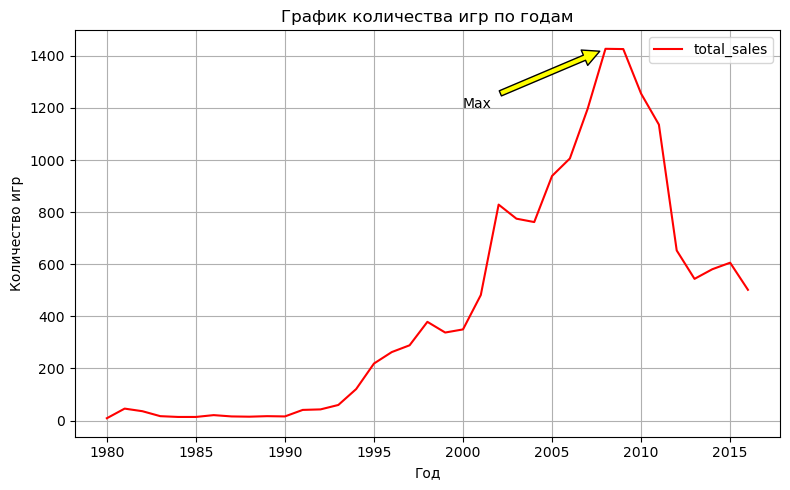

In [153]:
#Создадим сводную таблицу по общим продажам в год и построим график.
df.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc='count')\
.plot(title ='График количества игр по годам', color = 'red',figsize=(8, 5) )

plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.grid(True)

#Отобразим текстом и стрелкой максимум на графике.
plt.annotate('Max', xy=(2008, 1427), xytext=(2000, 1200),
             arrowprops=dict(facecolor='yellow', shrink=0.05),
             )

plt.tight_layout()

plt.show()

<span style="color: blue">По графику можно сделать вывод, что рост количества выпущенных игр начинается с 1994 года, до этого периода количество выпускаемых игр в год было примерно одинаковым. Данный вывод был сделан еще на этапе предобработки столбца `year_of_release`,  после применения к данному столбцу метода `value_counts()`. Поэтому в будущем анализе данными до 1994 можно пренебречь.

In [23]:
#Сделаем срез по году, отбросив все ниже 1994.

df_94 = df.query('year_of_release >= 1994')
df_94.sort_values('year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5011,Kileak: The DNA Imperative,PS,1994,Shooter,0.08,0.06,0.21,0.02,NaN,-999.0,no_info,0.37
14259,Puzzle & Action: Tant-R,GEN,1994,Misc,0.00,0.00,0.03,0.00,NaN,-999.0,no_info,0.03
4288,NHL FaceOff,PS,1994,Sports,0.25,0.17,0.00,0.03,NaN,-999.0,no_info,0.45
7815,SD Gundam GX,SNES,1994,Strategy,0.00,0.00,0.19,0.00,NaN,-999.0,no_info,0.19
5163,Ganbare Goemon 3: Shishi Jyuurokubei no Karaku...,SNES,1994,Platform,0.00,0.00,0.36,0.00,NaN,-999.0,no_info,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...
15532,Taishou Moebius Line Vitable,PSV,2016,Adventure,0.00,0.00,0.02,0.00,NaN,-999.0,no_info,0.02
7648,LEGO Marvel's Avengers,3DS,2016,Action,0.07,0.09,0.01,0.01,60.0,7.1,E10+,0.18
7646,Kan Colle Kai,PSV,2016,Action,0.00,0.00,0.19,0.00,NaN,-999.0,no_info,0.19
13006,Metroid Prime: Federation Force,3DS,2016,Action,0.02,0.01,0.01,0.00,64.0,5.1,T,0.04


### Проверим как менялись продажи игр по платформам

In [24]:
#Создадим сводную таблицу по трем значениям.
platform_sales = df_94.pivot_table(
    index=['year_of_release', 'platform'],\
    values='total_sales',\
    aggfunc=['count']
).reset_index()
platform_sales.columns = ['year_of_release', 'platform', 'total_sales']
display(platform_sales.tail())
#Сгруппируем по платформе и посчитаем сумму по каждому наименованию.
#Найдем самые массовые платформы.
platform_sales.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).head(10)

,year_of_release,platform,total_sales
192,2016,PSV,85
193,2016,Wii,1
194,2016,WiiU,14
195,2016,X360,13
196,2016,XOne,87


platform
PS2     2127
DS      2120
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       950
GBA      811
XB       803
Name: total_sales, dtype: int64

<span style="color: blue">Возьмем все платформы суммарные продажи которых выше 1000. Количество таких платформ равно ***СЕМИ (7)***.
Построим распределение наших лидеров по годам.

In [25]:
#Создадим список с лидерами.
platforms = ['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS']
#Сделаем срез по условию.
df_over1000 = df_94.query('platform in @platforms')
#Проверим, что в новом датафрейме только семь лидеров.
df_over1000['platform'].unique()



array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'PS', 'PSP'], dtype=object)

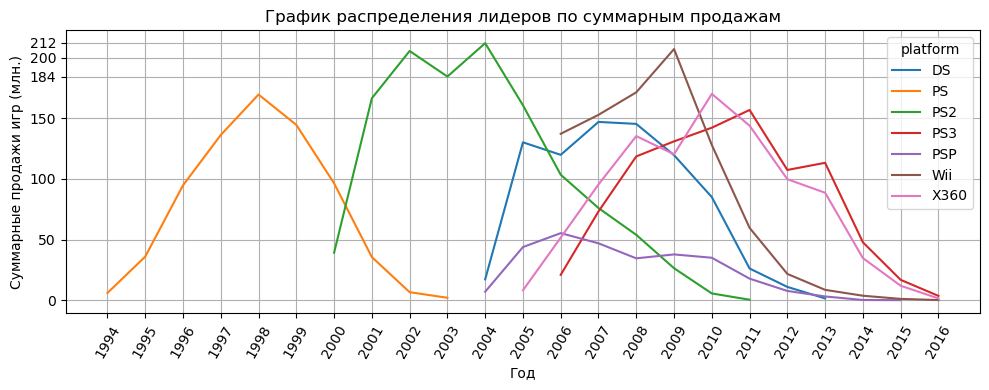

In [154]:
#Строим график для семи платформ-лидеров.
df_over1000.pivot_table(index='year_of_release',\
                        columns='platform',\
                        values='total_sales',\
                        aggfunc='sum'
                       ).plot(kind='line', grid=True, figsize=(10, 4))

#Ручное задание значений по оси Х.
plt.xticks([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,\
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])
#Угол наклона значений по оси Х.
plt.xticks(rotation=60)
#Ручное задание значений по оси Y.
plt.yticks([0, 50, 100, 150, 184, 200, 212])
#plt.yticks(rotation=40)
plt.xlabel('Год')
plt.ylabel('Суммарные продажи игр (млн.)')
plt.title('График распределения лидеров по суммарным продажам')
plt.tight_layout()
plt.show()


#### <span style="color: blue"> Вывод по продажам игр относительно платформ: 
    
________________________________________________________________________________________________________________________________    
По графику распределения семи самых продаваемых платформ видно, что средний цикл "жизни" одной платформы равен 10 годам, а средний выход на пиковые показатели по продажам с момента презентации платформы составляет 3.5 года.
    
Максимальных продаж добились платформы PS2 и Wii, причем у PS2 практически два одинаковых пика: в 2002 и 2004 году. При этом в 2003 году данная платформа также имела показатели выше среднего среди семи лидеров по продажам, а цикл жизни PS2 составил 11 лет, что дает нам право назвать данную платформу самой успешной из всех представленных в датафрейме.
    
Также особого внимания требует платформа PSP, поскольку она быстрее всех среди других вышла на пик продаж - через два года после презентации. Цикл ее "жизни" также составляет 11 лет.
    
В целом, по совокупности общих продаж и выпущенных платформ лидирует фирма "SONY"!
________________________________________________________________________________________________________________________________

### Строим прогноз на 2017 год

<span style="color: blue">Для выяснения лидеров продаж в 2017 году надо выяснить актуальный период для анализа предыдущих данных. Поскольку среднее время выхода игры на пик продаж составляет 3.5 года, о чем было сказано в предыдущем выводе, а максимальное время выхода на пик среди семи лидеров по продажам составляет 5 лет, то для максимально точного прогноза продаж в 2017 году стоит взять предыдущие 4 года: 2013, 2014, 2015, 2016. 

In [27]:
#Сделаем срез данных с 2013 года.
df_13 = df_94.query('year_of_release >=2013')
df_13.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,-999.0,no_info,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,-999.0,no_info,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [28]:
#Делаем сводную таблицу общих продаж платформ по годам.
forecast_2017 = df_13.pivot_table(
    index=['year_of_release', 'platform'],\
    values='total_sales',\
    aggfunc='count'
).reset_index()
display(forecast_2017.head())

#Отсортируем данные по сумме продаж платформ по убывающей.
print('Общие продажи платформ:')
forecast_2017.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False)

,year_of_release,platform,total_sales
0,2013,3DS,91
1,2013,DS,8
2,2013,PC,38
3,2013,PS3,126
4,2013,PS4,16


Общие продажи платформ:


platform
PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: total_sales, dtype: int64

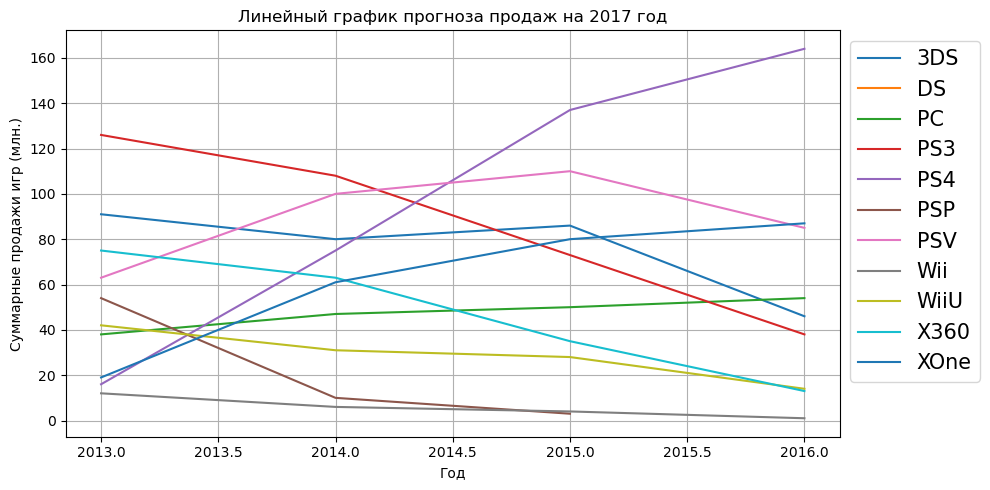

In [157]:
#Сделаем график по сводной таблице.
forecast_2017.pivot_table(index='year_of_release',\
                        columns='platform',\
                        values='total_sales',\
                        aggfunc='sum'
                       ).plot(kind='line', grid=True, figsize=(10, 5))
plt.xlabel('Год')
plt.ylabel('Суммарные продажи игр (млн.)')
plt.title('Линейный график прогноза продаж на 2017 год')
#bbox_to_anchor вынесет легенду за график.
plt.legend(loc='upper left', prop={'size': 15}, bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<span style="color: blue">Для точности сделаем еще столбчатую диаграмму, чтобы наверняка убедиться в растущих платформах и тенденциях.

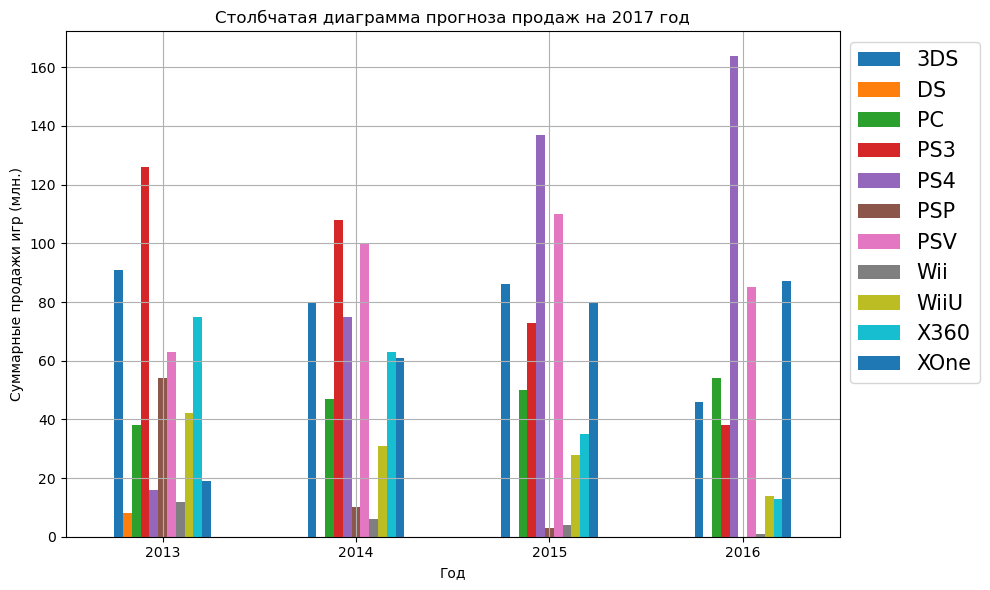

In [160]:
forecast_2017.pivot_table(index='year_of_release',\
                        columns='platform',\
                        values='total_sales',\
                        aggfunc='sum'
                       ).plot(kind='bar', grid=True, figsize=(10, 6))
plt.xlabel('Год')
plt.ylabel('Суммарные продажи игр (млн.)')
plt.title('Столбчатая диаграмма прогноза продаж на 2017 год')
#Изменяем размер плашки со значением цвета каждой платформы (prop)
#и ее положение на графике (loc).
#plt.legend(loc=1, prop={'size': 8})
plt.legend(loc='upper left', prop={'size': 15}, bbox_to_anchor=(1, 1))
#Наклон значений по оси Х.
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### <span style="color: blue">Прогноз на 2017 год:
________________________________________________________________________________________________________________________________    
Из графика видно, что рост наблюдается у платформ `PC`, `XOne`, `PS4`, поэтому на них стоит обратить максимально пристальное внимание при планировании закупок.
    
Опираясь на предыдущий анализ семи лидеров продаж, можно сделать вывод, что платформы `XOne` и `PS4` в 2017 году достигнут своего пика, поскольку среднее время его достижения равно `3.5 годам`, а дата выхода в свет данных платформ соответственно:
- `XOne`  22.11.2013,
- `PS4`   15.11.2013. 
    
Наиболее выгодной платформой по количеству продаж игр ожидается `PS4`. 
    
Также стоит обратить внимание на платформу `PSV` - она хоть и миновала пик своих продаж в 2015 году, но учитывая средний цикл жизни платформ (10 лет) и дату выхода: 17.12.2011, а также ее суммарное количество продаж, можно утверждать, что в 2017 году данная платформа будет иметь высокий уровень продаж. Ее можно смело занести в "крепкие середняки". 
    
В аутсайдеры можно записать платформы `DS`, `PSP`, `Wii`. Продажи данных платформ стремятся к нулю, поэтому на них вовсе не стоит обращать внимания при планировании закупок на 2017 год.
________________________________________________________________________________________________________________________________

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам, начиная с 2013 года.

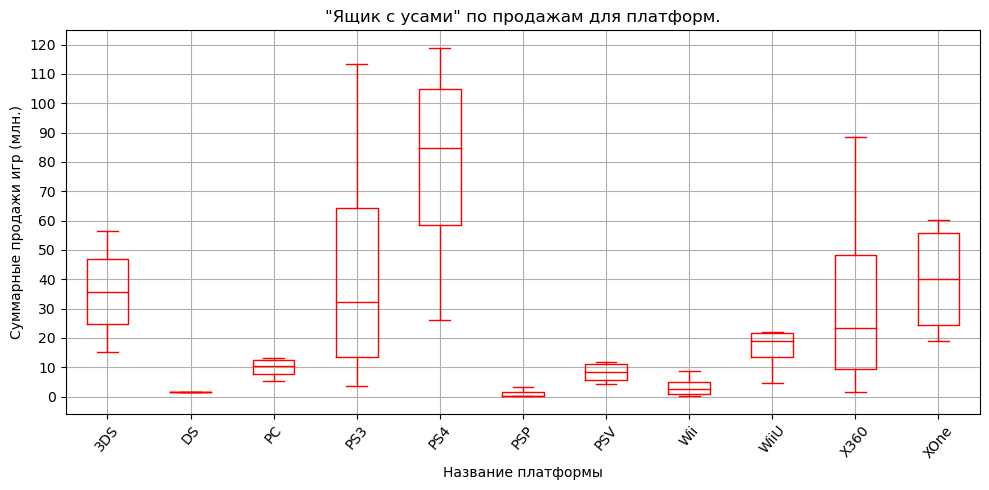

In [161]:
df_13.pivot_table(index='year_of_release',\
                        columns='platform',\
                        values='total_sales',\
                        aggfunc='sum'
                       ).plot(kind='box', grid=True, figsize=(10, 5), color='red')
plt.xticks(rotation=50)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,  120, ])
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи игр (млн.)')
plt.title('"Ящик с усами" по продажам для платформ.')
plt.tight_layout()
plt.show()


#### <span style="color: blue">Вывод по графику "ящик с усами" о глобальных продажах игр в разбивке по платформам с 2013 по 2016 годы.

Из графика видно, что медианное количество продаж игр по платформам с 2013 по 2016 год распределено по убывающей в следующем порядке (от большего к меньшему): `PS4`, `XOne`, `3DS`, `PS3`, `X360`, `WiiU`, `PC`, `PSV`, `Wii`, `DS`, `PSP`.
    
Наибольшее пиковое значение проданных игр у платформы `PS4`, от нее незначительно отстает `PS3`, но у `PS3` существенно ниже медиана. Это говорит нам о том, что платформа `PS3` в начале 2013 года находилась на высоком месте по продажам, но далее стала терять свои позиции, что не удивительно, ведь 15.11.2013 вышла `PS4`, которая своим выходом сразу обрушила продажи платформы предыдущего поколения.
    
В целом можно сказать, что платформа `PS4` безоговорочный лидер по медианному значению продаж, по пиковому (максимальному) значению продаж за год, так и по межквартильному размаху продаж.
    
В аутсайдеры можно отнести платформы `DS`, `PSP` – их продажи находятся в районе нуля. 


### Посмотрим, как влияют на продажи внутри трех перспективных платформ отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

#### <span style="color: blue">В качестве первой платформы возьмем явного лидера `PS4`и оценим влияние *критиков* на продажи этой платформы. Может быть все критики куплены и успех данной платформы один большой пузырь? Проверим это.

In [32]:
#Создадим новый датафрейм по срезу.
df_ps4 = df_13.query('platform == "PS4"')
df_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,-999.0,no_info,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,-999.0,no_info,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [33]:
#Создадим сводную таблицу.
critica = df_ps4.pivot_table(\
                             index=['year_of_release', 'platform', 'critic_score', 'user_score'],
                             values='total_sales',
                             aggfunc='sum').reset_index()
critica.head()

,year_of_release,platform,critic_score,user_score,total_sales
0,2013,PS4,38.0,2.9,0.16
1,2013,PS4,43.0,2.7,0.24
2,2013,PS4,47.0,2.0,0.22
3,2013,PS4,54.0,6.5,1.73
4,2013,PS4,73.0,6.8,2.69


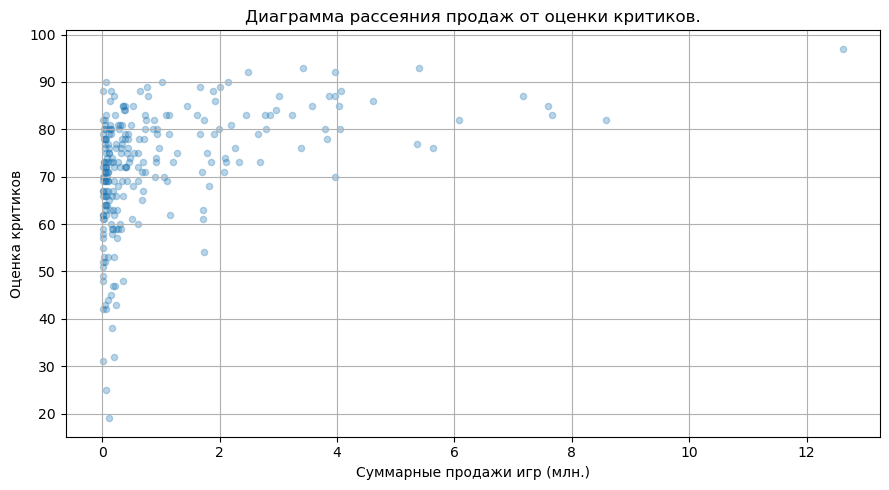

In [164]:
# Построим диаграмму рассеяния для критиков.
critica.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3, figsize=(9, 5))
plt.title('Диаграмма рассеяния продаж от оценки критиков.')
plt.xlabel('Суммарные продажи игр (млн.)')
plt.ylabel('Оценка критиков')
plt.grid(True)

plt.tight_layout()
plt.show()



<span style="color: blue">Рассчитаем корреляцию продаж игр `PS4`от оценок критиков.

In [35]:
print('Коэффициент корреляции между оценками критиков и общими продажами равен: ',\
      critica['total_sales'].corr(critica['critic_score']))

Коэффициент корреляции между оценками критиков и общими продажами равен:  0.4094699054143207


<span style="color: blue">**Вывод по оценкам критиков:**
________________________________________________________________________________________________________________________________    
Корреляция общих продаж платформы `PS4` от оценки критиков имеет положительное среднее значение. Это говорит о том, что зависимость продаж от оценки критиков есть, но она не является решающим фактором, влияющим на общие продажи игр платформы `PS4`.
________________________________________________________________________________________________________________________________

#### <span style="color: blue">Анализ влияния оценок ***пользователей*** для платформы `PS4`.

In [185]:
#Сделаем срез по оценкам пользователей больше 0.
critica_user_score = critica.loc[critica['user_score'] > 0]
display(critica_user_score.head())

#Проверим, что все значения положительные.
if (critica_user_score['user_score'] < 0).any():
    print("Отрицательные значения оценок обнаружены!")
else:
    print("Все оценки положительные!")

,year_of_release,platform,critic_score,user_score,total_sales
0,2013,PS4,38.0,2.9,0.16
1,2013,PS4,43.0,2.7,0.24
2,2013,PS4,47.0,2.0,0.22
3,2013,PS4,54.0,6.5,1.73
4,2013,PS4,73.0,6.8,2.69


Все оценки положительные!


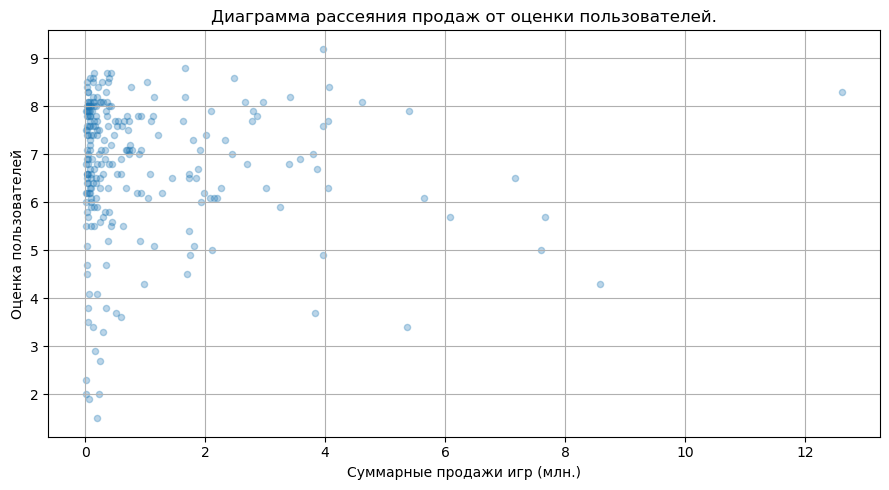

In [166]:
# Построим диаграмму рассеяния для оценок пользователей.
critica_user_score.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3, figsize=(9, 5))
plt.title('Диаграмма рассеяния продаж от оценки пользователей.')
plt.xlabel('Суммарные продажи игр (млн.)')
plt.ylabel('Оценка пользователей')

plt.grid(True)
plt.tight_layout()
plt.show()

<span style="color: blue"> Рассчитаем корреляцию общих продаж `PS4` от оценок пользователей.

In [38]:
print('Коэффициент корреляции между оценками пользователей и общими продажами равен: ',\
      critica_user_score['total_sales'].corr(critica_user_score['user_score']))

Коэффициент корреляции между оценками пользователей и общими продажами равен:  -0.03494894318738125


<span style="color: blue">**Вывод по оценкам пользователей*:**
________________________________________________________________________________________________________________________________    
Корреляция общих продаж платформы `PS4` от оценки пользователей имеет отрицательное, но очень невысокое значение. Это говорит о том, что зависимость продаж от оценки пользователей крайне мала, практически отсутствует и точно не является решающим фактором, влияющим на общие продажи игр платформы `PS4`.
________________________________________________________________________________________________________________________________
    
#### <span style="color: blue">Итоговый вывод по `PS4`:
________________________________________________________________________________________________________________________________    
Корреляция оценки критиков с общими продажами игр платформы `PS4`в десятки раза выше подобной корреляции пользователей, но суммарно оценки критиков и пользователей не влияют критично на общие продажи игр данной платформы. Что и подтверждают построенные нами диаграммы рассеяния. Стоит быть аккуратным с экстраполяцией данного вывода на другие платформы. Для полноты картины стоит провести подобное исследование еще хотя бы с 2-3 платформами, чтобы делать какие-то общие выводы. На продажи могут влиять особенности локального рынка, преданные фанаты, рекламные кампании и многие другие факторы.
________________________________________________________________________________________________________________________________


    
#### <span style="color: blue"> Анализ влияния оценок ***критиков*** для платформы `PC`.

In [39]:
#Делаем срез по условию.
df_pc = df_13.query('platform == "PC"')
df_pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
455,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1084,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67
1337,SimCity (2013),PC,2013,Simulation,0.48,0.77,0.0,0.17,64.0,2.2,E10+,1.42
1423,Battlefield 4,PC,2013,Shooter,0.39,0.87,0.0,0.10,81.0,6.0,M,1.36
1515,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28


In [40]:
#Создадим сводную таблицу.
pc = df_pc.pivot_table(\
                             index=['year_of_release', 'platform', 'critic_score', 'user_score'],
                             values='total_sales',
                             aggfunc='sum').reset_index()
pc.head()

,year_of_release,platform,critic_score,user_score,total_sales
0,2013,PC,33.0,3.3,0.08
1,2013,PC,45.0,3.5,0.18
2,2013,PC,52.0,5.8,0.08
3,2013,PC,61.0,6.2,0.04
4,2013,PC,62.0,7.7,0.01


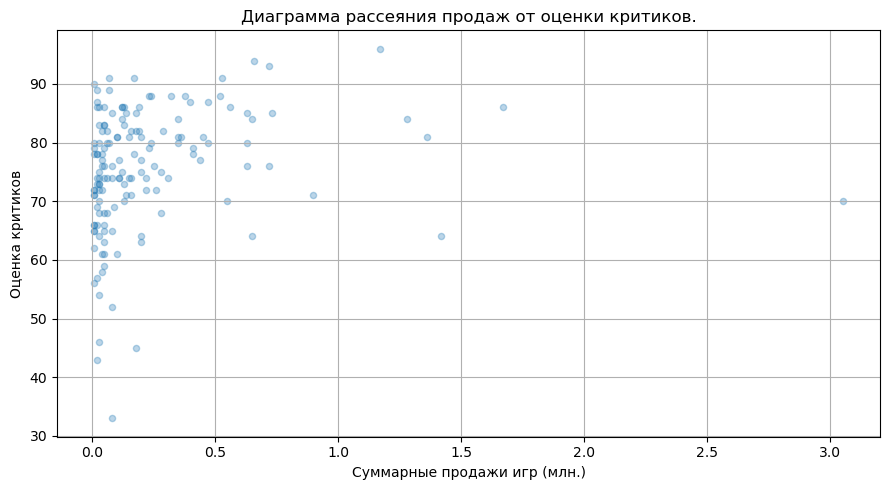

In [167]:
# Построим диаграмму рассеяния продаж платформы РС для критиков.
pc.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3, figsize=(9, 5))
plt.title('Диаграмма рассеяния продаж от оценки критиков.')
plt.xlabel('Суммарные продажи игр (млн.)')
plt.ylabel('Оценка критиков')

plt.grid(True)
plt.tight_layout()
plt.show()

In [168]:
print('Коэффициент корреляции между оценками критиков и общими продажами равен: ',\
      pc['total_sales'].corr(pc['critic_score']))

Коэффициент корреляции между оценками критиков и общими продажами равен:  0.19603028294369373



 
<span style="color: blue">**Вывод по оценкам *критиков*:**
    
________________________________________________________________________________________________________________________________    
Коэффициент корреляции между продажами платформы `PC` и оценками критиков имеет положительное близкое к нулю число. Что говорит о незначительном прямопропорциональном влиянии оценок критиков на продажи данной платформы.
________________________________________________________________________________________________________________________________    



#### <span style="color: blue">Анализ влияния оценок ***пользователей*** для платформы `PC`.

In [186]:
#Сделаем срез по оценкам пользователей больше 0.
pc_user_score = pc.loc[pc['user_score'] > 0]
display(pc_user_score.head())
#Проверим, что все значения положительные.
if (pc_user_score['user_score'] < 0).any():
    print("Отрицательные значения оценок обнаружены!")
else:
    print("Все оценки положительные!")

,year_of_release,platform,critic_score,user_score,total_sales
0,2013,PC,33.0,3.3,0.08
1,2013,PC,45.0,3.5,0.18
2,2013,PC,52.0,5.8,0.08
3,2013,PC,61.0,6.2,0.04
4,2013,PC,62.0,7.7,0.01


Все оценки положительные!


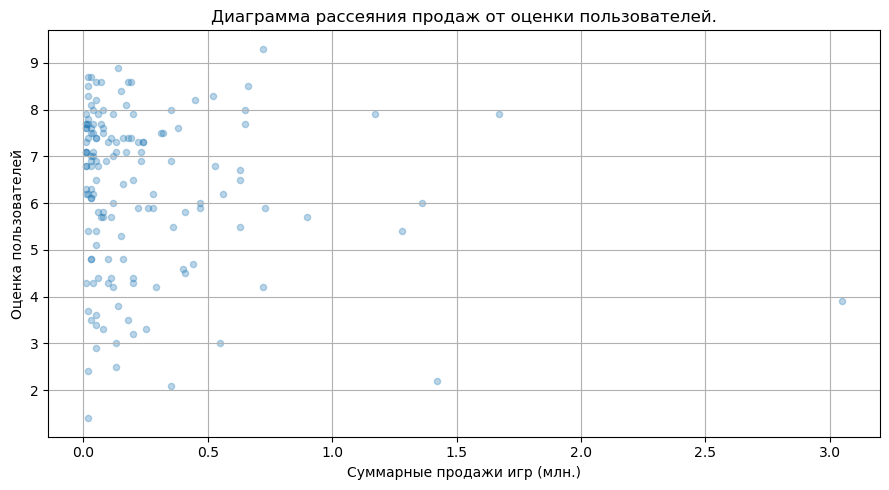

In [188]:
# Построим диаграмму рассеяния для оценок пользователей.
pc_user_score.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3, figsize=(9, 5))
plt.title('Диаграмма рассеяния продаж от оценки пользователей.')
plt.xlabel('Суммарные продажи игр (млн.)')
plt.ylabel('Оценка пользователей')

plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
print('Коэффициент корреляции между оценками пользователей и общими продажами равен: ',\
      pc_user_score['total_sales'].corr(pc_user_score['user_score']))

Коэффициент корреляции между оценками пользователей и общими продажами равен:  -0.1092350275820934



    
<span style="color: blue">**Вывод по оценкам *пользователей*:**
________________________________________________________________________________________________________________________________    
Коэффициент корреляции между оценками пользователей и продажами платформы `PC` имеет невысокое отрицательное значение, что говорит нам о очень незначительной обратнопропорциональной зависимости продаж платформы `PC`от оценок пользователей. 
________________________________________________________________________________________________________________________________


    
#### <span style="color: blue">Итоговый вывод по `РС`:
    
________________________________________________________________________________________________________________________________    
Оценки как критиков, так и пользователей не имеют сильного влияния на продажи платформы `PC`, что можно объяснить сформировавшимся коммьюнити вокруг данной платформы, чему способствует срок жизни данной платформы. 
________________________________________________________________________________________________________________________________


 
#### <span style="color: blue">Анализ влияния оценок ***критиков*** на платформу `XOne`.    

In [46]:
#Делаем срез по условию.
df_xone = df_13.query('platform == "XOne"')
df_xone.head()
#Создадим сводную таблицу.
xone = df_xone.pivot_table(\
                             index=['year_of_release', 'platform', 'critic_score', 'user_score'],
                             values='total_sales',
                             aggfunc='sum').reset_index()
xone.head()

,year_of_release,platform,critic_score,user_score,total_sales
0,2013,XOne,23.0,3.0,0.20
1,2013,XOne,36.0,3.1,0.20
2,2013,XOne,53.0,6.9,0.17
3,2013,XOne,60.0,6.1,1.39
4,2013,XOne,71.0,7.0,0.45


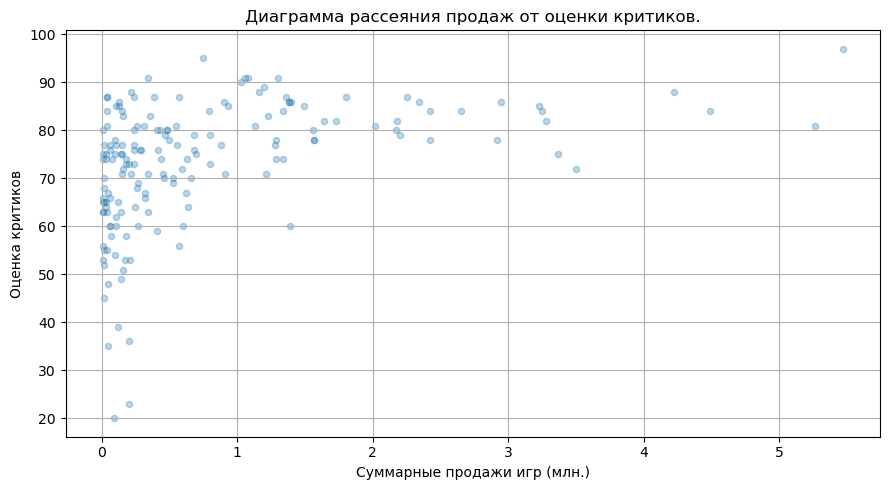

In [189]:
# Построим диаграмму рассеяния продаж платформы XOne для критиков.
xone.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3, figsize=(9, 5))
plt.title('Диаграмма рассеяния продаж от оценки критиков.')
plt.xlabel('Суммарные продажи игр (млн.)')
plt.ylabel('Оценка критиков')

plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
print('Коэффициент корреляции между оценками критиков и общими продажами равен: ',\
      xone['total_sales'].corr(xone['critic_score']))

Коэффициент корреляции между оценками критиков и общими продажами равен:  0.41967931508224054



    
<span style="color: blue">**Вывод по оценкам *критиков*:** 
________________________________________________________________________________________________________________________________    
Коэффициент корреляции продаж платформы `XOne` от оценок критиков имеет положительное значение менее 0.5, что свидетельствует о некоторой положительной прямопропорциональной взаимосвязи этих двух параметров. Но эта связь не критично влияет на продажи изучаемой платформы.
________________________________________________________________________________________________________________________________



#### <span style="color: blue">Анализ влияния оценок ***пользователей*** на платформу `XOne`.

In [190]:
#Сделаем срез по оценкам пользователей больше 0.
xone_user_score = xone.loc[xone['user_score'] > 0]
display(xone_user_score.head())

#Проверим, что все значения положительные.
if (xone_user_score['user_score'] < 0).any():
    print("Отрицательные значения оценок обнаружены!")
else:
    print("Все оценки положительные!")

,year_of_release,platform,critic_score,user_score,total_sales
0,2013,XOne,23.0,3.0,0.20
1,2013,XOne,36.0,3.1,0.20
2,2013,XOne,53.0,6.9,0.17
3,2013,XOne,60.0,6.1,1.39
4,2013,XOne,71.0,7.0,0.45


Все оценки положительные!


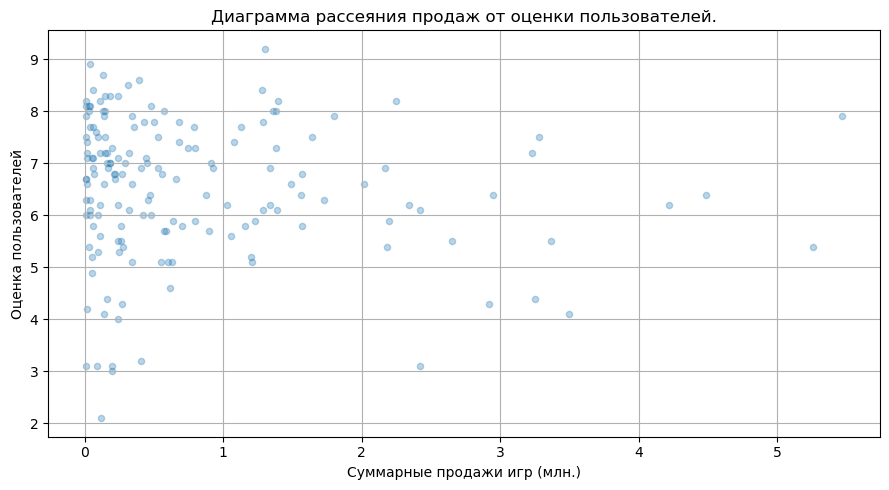

In [191]:
# Построим диаграмму рассеяния для оценок пользователей.
xone_user_score.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3, figsize=(9, 5))
plt.title('Диаграмма рассеяния продаж от оценки пользователей.')
plt.xlabel('Суммарные продажи игр (млн.)')
plt.ylabel('Оценка пользователей')

plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
print('Коэффициент корреляции между оценками пользователей и общими продажами равен: ',\
      xone_user_score['total_sales'].corr(xone_user_score['user_score']))

Коэффициент корреляции между оценками пользователей и общими продажами равен:  -0.0915637722127109



    
<span style="color: blue">**Вывод по оценкам *пользователей*:**
________________________________________________________________________________________________________________________________    
Коэффициент корреляции продаж платформы `XOne` от оценок пользователей имеет незначительное, близкое к нулю отрицательно значение, что соответствует практически нулевой корреляции продаж платформы с оценками пользователей.
________________________________________________________________________________________________________________________________


    
#### <span style="color: blue">Общий вывод по платформе `XOne`:
________________________________________________________________________________________________________________________________    
Влияние оценок критиков в данной платформе существенно выше влияния пользователей, но суммарно общая критика не сильно влият на продажи платформы `Xone`.
________________________________________________________________________________________________________________________________


    
### <span style="color: blue"> Общий вывод о влиянии оценок на продажи по трем платформам `PS4`, `PC`, `XOne`:
   ________________________________________________________________________________________________________________________________    
Анализ влияния внешних оценок на перспективные для 2017 года платформы показал, что по всем трем платформам влияние пользователей имеет отрицательный характер и близкое к нулю значение (не менее -0.1).
    
Влияние критиков более ощутимо, по всем исследуемым платформам влияние имеет положительнный характер с максимальным значением 0.41, чего все равно не достаточно для того, чтобы утверждать о существенном влиянии оценок критиков. Таким образом, можно утверждать, что оценки как критиков, так и пользователей не смогут ни обвалить продажи перспективных платформ, ни существенно увеличить их. Данный вывод намекает на то, что магазину "Стримчик" стоит со всей отвественностью подойти к планированию бюджета для рекламной кампании перспективных платформ, поскольку, именно это будет определяющим в будущих объемах продаж перспективных платформ. 
    
При планировании будущей рекламной кампании стоит работать с наиболее авторитетными критиками в индустрии, не распыляясь на критиков и блоггеров средней руки, при этом не делать данное направление продвижения продукта главным – работа с критиками должна быть одним из второстепенных направлений в общей рекламной кампании. Также не стоит особенно рассчитывать на мнение пользовательского комьюнити в вопросе роста будущих продаж.
    
Важно искать альтернативные каналы продвижения продукта!
________________________________________________________________________________________________________________________________    

## Изучим общее распределение игр по жанрам

In [52]:
#Сгруппируем игры по жанрам и посчитаем их количество, сумму, медиану и среднее общих продаж.
#Отсортируем данные по убыванию количества выпущенных игр.
df_13.groupby('genre')['total_sales'].agg(['median', 'mean', 'count', 'sum']).sort_values(by='count', ascending=False)

,median,mean,count,sum
genre,,,,
Action,0.110,0.420196,766,321.87
Role-Playing,0.125,0.499623,292,145.89
Adventure,0.030,0.096490,245,23.64
Sports,0.240,0.703972,214,150.65
Shooter,0.450,1.245882,187,232.98
Misc,0.100,0.405290,155,62.82
Racing,0.120,0.469294,85,39.89
Fighting,0.125,0.441375,80,35.31
Platform,0.225,0.576081,74,42.63


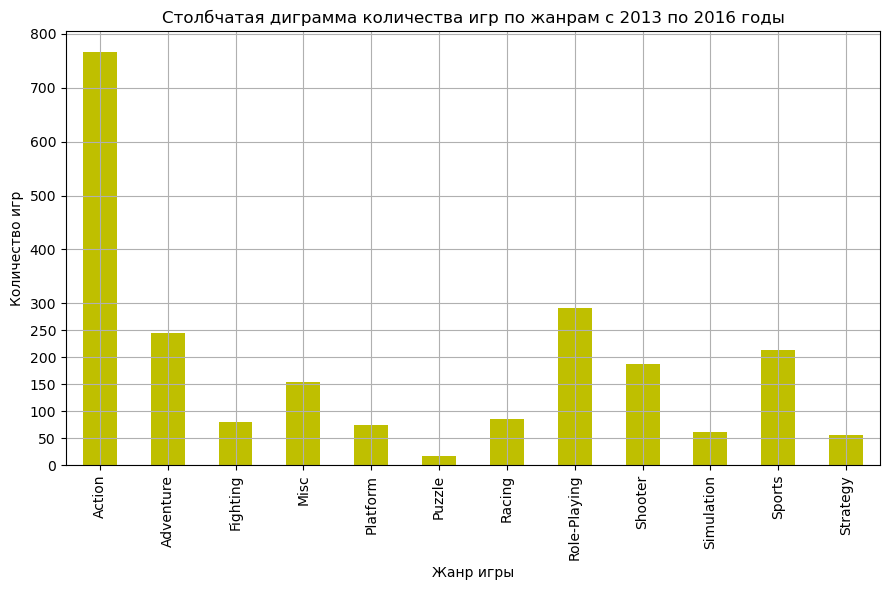

In [196]:
#Построим столбчатую диаграмму количества игр по жанрам.
df_13.groupby('genre')['total_sales'].agg('count').plot(kind='bar', grid=True, figsize=(9, 6), color='y')
plt.title('Столбчатая диграмма количества игр по жанрам с 2013 по 2016 годы')
plt.xlabel('Жанр игры')
plt.ylabel('Количество игр')
plt.yticks([0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800])

plt.tight_layout()
plt.show()

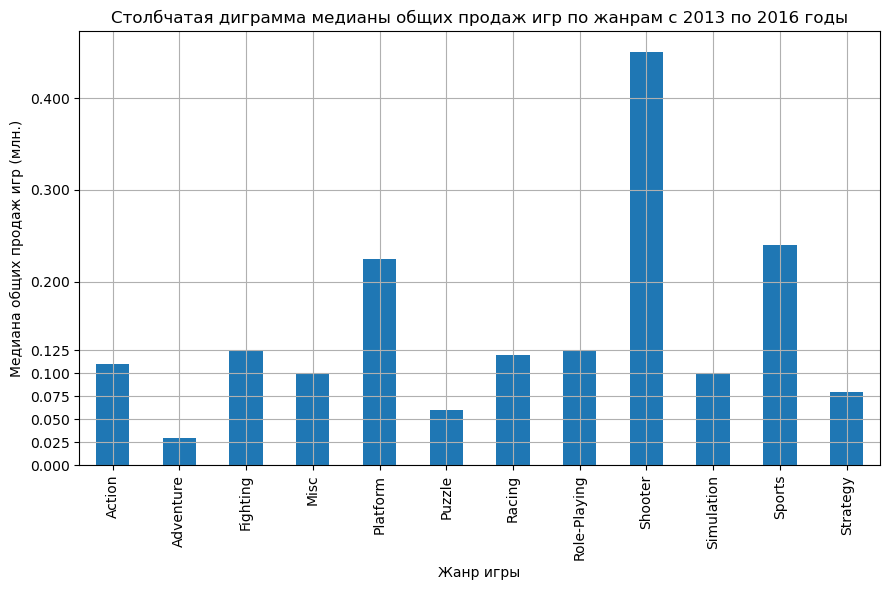

In [197]:
#Построим диаграмму медианных продаж игр по жанрам.
df_13.groupby('genre')['total_sales'].agg('median').plot(kind='bar', grid=True, figsize=(9, 6))
plt.title('Столбчатая диграмма медианы общих продаж игр по жанрам с 2013 по 2016 годы')
plt.xlabel('Жанр игры')
plt.ylabel('Медиана общих продаж игр (млн.)')
plt.yticks([0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.2, 0.3, 0.4])

plt.tight_layout()
plt.show()





### <span style="color: blue">Вывод:
________________________________________________________________________________________________________________________________    
У нас есть всего 12 жанров.
    
Абсолютный лидер по количеству выпущенных игр — жанр `Action`.
    
Далее игры можно разделить на две категории по количеству:
    
- более 100 штук (по убывающей):`Role-Playing`, `Adventure`, `Sports`, `Shooter`, `Misc`.
- менее 100 штук (по убывающей):`Racing`, `Fighting`, `Platform`, `Simulation`, `Strategy`, аутсайдер — `Puzzle`.

Если рассматривать все те же самые жанры по медианному значению общих продаж, то получаем следующую картину (по убывающей):
    
- Абсолютный лидер по продажам жанр `Shooter` (400 тыс.копий),    
- далее идут жанры `Sports` и `Platform`(более 200 тыс.),
- за ними плотная группа с медианными продажами в диапазоне 50-125 тыс. копий:
    - `Role-Playing`,
    - `Fighting`,
    - `Racing`,
    - `Action`,
    - `Simulation`,
    - `Misc`,
    - `Strategy`, `Puzzle`.
- И замыкает наш рейтинг жанр `Adventure` с 30 тыс. копий игр в данном жанре.

Как видно из приведенных выше данных, количество не всегда равно качество (под качеством имеем медианные продажи). Казалось бы, жанр `Action` должен всех разрывать по прибыльности, но графики показывают совсем другое. При количестве выпущенных игр в 766 штук, медианная сумма продаж составляет лишь 110 тыс.копий – это 7 место по продажам!
Жанр `Adventure` ведет себя подобно, при 3 месте по количеству он занимает последнее по продажам! Это может говорить о том, что в данных жанрах сделать игру довольно просто, а вот сделать ее качественно уже намного сложнее))) Так же про `Action` можно сказать, что такое количество может быть обусловлено тем, что многие пытаются повторить успех отделных представитедлей данного жанра.

Совсем другую картину мы видим с жанром `Shooter`. Игр этого жанра за актуальный период выпущено всего 187 штук – это 5 показатель, однако прибыльность данного жанра самая высокая – 450 тыс. копий! Здесь произволители более щепетильно подходят к вопросу качества и пользователи это оценивают кошельком. Магазину "Сетевичок" стоит обратить особое внимание на игры этого жанра при планировании продаж на 2017 год.
    
Также не стоит обделять вниманием жанры `Sports` и `Platform`, которые продаются в количестве 240 и 225 тыс. копий соответственно. При этом жанр `Sports` 4 по количеству, а вот `Platform` всего лишь 9 (74 штуки), поэтому за право эксклюзивных продаж игр из жанра `Platform` стоит особенно бороться с конкурентами, ведь этих игр не так уж и много!

Явный аутсайдер – жанр 
`Puzzle` показывает прямую зависимость, мало игр (17), мало продаж. 60 тыс., именно столько нашлось желающих напрягать свой мозг за свои кровно заработанные деньги - эти люди достойны уважения, не не внимания магазина "Сетевичок")))
________________________________________________________________________________________________________________________________

## Составим портрет пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5)

#### Определим топ-5 для североамериканских пользователей

In [64]:
#Создадим сводную таблицу по платформе и количеству с суммой продаж в США.
na_users = df_13.pivot_table(\
                            index='platform',
                            values='na_sales',
                            aggfunc='sum')

#Сортируем по убыванию и выводим первые пять.
na_users = na_users.sort_values(by='na_sales', ascending=False).reset_index().head()
na_users

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


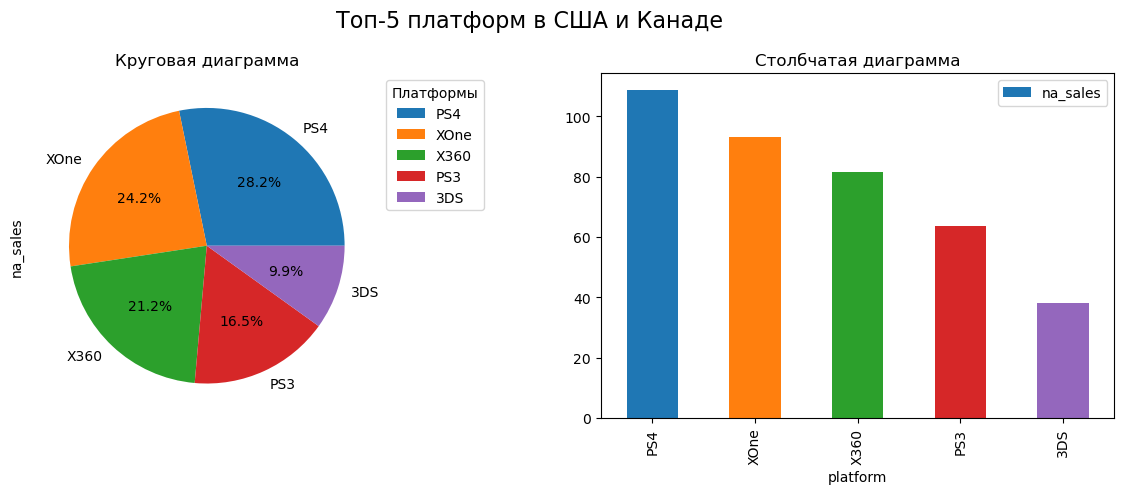

In [81]:
#создаем фигуру с двумя графиками рядом
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#укажем цвета для каждой платформы
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

#первый график (круговая диаграмма)
na_users.plot(kind='pie', y='na_sales', labels=na_users['platform'], autopct='%1.1f%%', ax=axes[0], colors=colors)
axes[0].set_title('Круговая диаграмма')

#второй график (столбчатая диаграмма)
na_users.plot(kind='bar', x='platform', y='na_sales', ax=axes[1], color=colors)
axes[1].set_title('Столбчатая диаграмма')

#выносим легенду графика pie за график, чтобы не перекрывала значения
legend = axes[0].legend(title="Платформы", loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

#общее название для обоих графиков
fig.suptitle('Топ-5 платформ в США и Канаде', fontsize=16)

#регулировка расстояния между графиками
plt.tight_layout()

plt.show()


#### Определим топ-5 для европейских пользователей

In [83]:
#Создадим сводную таблицу по платформе и количеству с суммой продаж в Европе.
eu_users = df_13.pivot_table(\
                            index='platform',
                            values='eu_sales',
                            aggfunc='sum')
#Сортируем по убыванию и выводим первые пять.
eu_users = eu_users.sort_values(by='eu_sales', ascending=False).reset_index().head()
eu_users

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


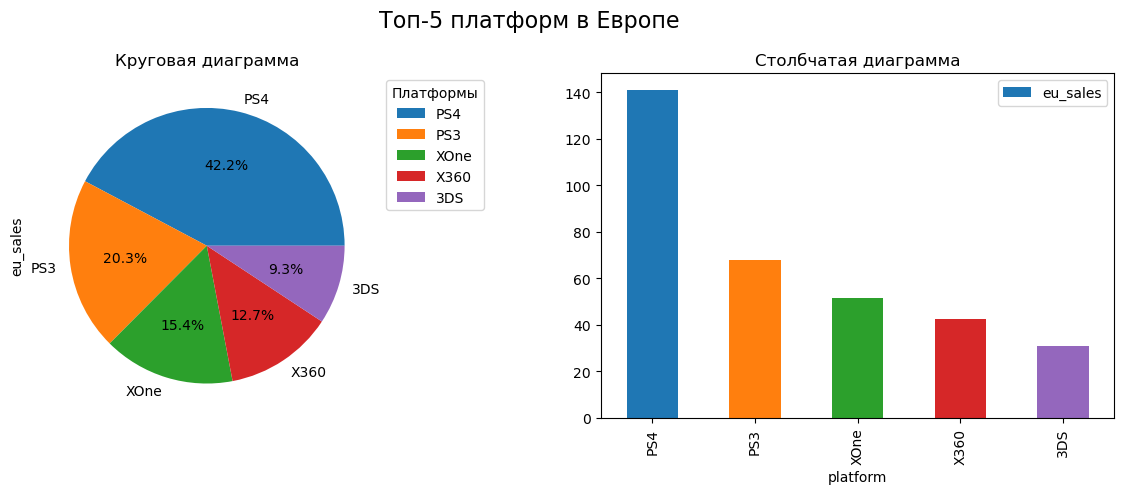

In [84]:
#создаем фигуру с двумя графиками рядом
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#укажем цвета для каждой платформы
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

#первый график (круговая диаграмма)
eu_users.plot(kind='pie', y='eu_sales', labels=eu_users['platform'], autopct='%1.1f%%', ax=axes[0], colors=colors)
axes[0].set_title('Круговая диаграмма')

#второй график (столбчатая диаграмма)
eu_users.plot(kind='bar', x='platform', y='eu_sales', ax=axes[1], color=colors)
axes[1].set_title('Столбчатая диаграмма')

#выносим легенду графика pie за график, чтобы не перекрывала значения
legend = axes[0].legend(title="Платформы", loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

#общее название для обоих графиков
fig.suptitle('Топ-5 платформ в Европе', fontsize=16)

#регулировка расстояния между графиками
plt.tight_layout()

plt.show()

#### Определим топ-5 для японских пользователей

In [85]:
#Создадим сводную таблицу по платформе и количеству с суммой продаж в Японии.
jp_users = df_13.pivot_table(\
                            index='platform',
                            values='jp_sales',
                            aggfunc='sum')
#Сортируем по убыванию и выводим первые пять.
jp_users = jp_users.sort_values(by='jp_sales', ascending=False).reset_index().head()
jp_users

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


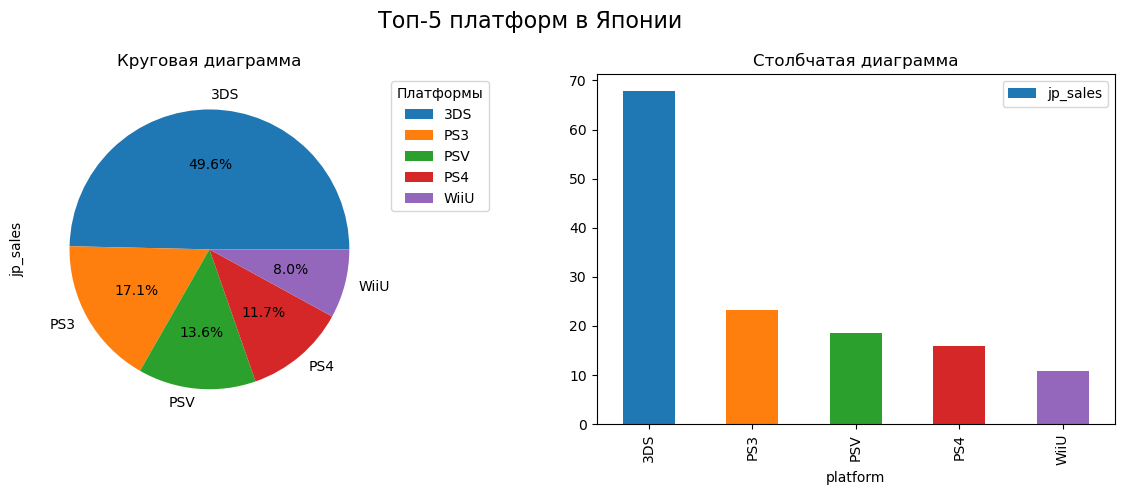

In [86]:
#создаем фигуру с двумя графиками рядом
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#укажем цвета для каждой платформы
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

#первый график (круговая диаграмма)
jp_users.plot(kind='pie', y='jp_sales', labels=jp_users['platform'], autopct='%1.1f%%', ax=axes[0], colors=colors)
axes[0].set_title('Круговая диаграмма')

#второй график (столбчатая диаграмма)
jp_users.plot(kind='bar', x='platform', y='jp_sales', ax=axes[1], color=colors)
axes[1].set_title('Столбчатая диаграмма')

#выносим легенду графика pie за график, чтобы не перекрывала значения
legend = axes[0].legend(title="Платформы", loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

#общее название для обоих графиков
fig.suptitle('Топ-5 платформ в Японии', fontsize=16)

#регулировка расстояния между графиками
plt.tight_layout()

plt.show()

In [203]:
#Сводная таблица по всем регионам.
users = df_13.pivot_table(\
                            index='platform',
                            values=['na_sales', 'eu_sales', 'jp_sales'],
                            aggfunc='sum').reset_index()
display(users.head())
print('Топ-5 для североамериканских пользователей: ')
print('-'*45)
print(users.sort_values(by='na_sales', ascending=False).head())
print()
print('Топ-5 для европейских пользователей: ')
print('-'*45)
print(users.sort_values(by='eu_sales', ascending=False).head())
print()
print('Топ-5 для японских пользователей: ')
print('-'*45)
print(users.sort_values(by='jp_sales', ascending=False).head())

,platform,eu_sales,jp_sales,na_sales
0,3DS,30.96,67.81,38.20
1,DS,0.85,0.00,0.57
2,PC,25.36,0.00,11.11
3,PS3,67.81,23.35,63.50
4,PS4,141.09,15.96,108.74


Топ-5 для североамериканских пользователей: 
---------------------------------------------
   platform  eu_sales  jp_sales  na_sales
4       PS4    141.09     15.96    108.74
10     XOne     51.59      0.34     93.12
9      X360     42.52      0.51     81.66
3       PS3     67.81     23.35     63.50
0       3DS     30.96     67.81     38.20

Топ-5 для европейских пользователей: 
---------------------------------------------
   platform  eu_sales  jp_sales  na_sales
4       PS4    141.09     15.96    108.74
3       PS3     67.81     23.35     63.50
10     XOne     51.59      0.34     93.12
9      X360     42.52      0.51     81.66
0       3DS     30.96     67.81     38.20

Топ-5 для японских пользователей: 
---------------------------------------------
  platform  eu_sales  jp_sales  na_sales
0      3DS     30.96     67.81     38.20
3      PS3     67.81     23.35     63.50
6      PSV      6.10     18.59      5.04
4      PS4    141.09     15.96    108.74
8     WiiU     19.85     10.88   

#### <span style="color: blue">Вывод по топ-5 платформ в регионах:
________________________________________________________________________________________________________________________________
Анализ топ-5 платформ по каждому региону показал, что в Северной Америке (СА) и Европе лидирует платформа `PS4`. В Европе данная платформа доминирует с долей в 42%, в СА не все так однозначно: `PS4` имеет 28% рынка, второе место –`XOne` имеет долю 24%, а третье – `X360` занимает 21%, что можно объяснить активной локальной политикой производителя `XOne` и `X360`– данные платформы детище американской компании Microsoft. 

В целом в СА довольно равномерно распределены все платформы и явным аутсайдером выступает платформа `3DS` – единственная портативная платформа, вошедшая в Топ-5 СА, что подтверждает тренд на популярность домашних, подключаемых к телевизору, платформ в СА. В Европе такой же тренд и доля платформы `3DS` не превышает 10%, как в СА. 

При этом на рынке Европы с явным преимуществом доминирут платформы из Японии (`PS4`,`PS3`,`3DS`)с суммарной долей в 71%. В СА доля платформ производства Японии составляет 54%, а производства США – 45%, что еще раз подтверждает патриотизм североамериканцев).

Но граждан Японии американцам все равно не догнать, ведь в Японии в Топ-5 продаваемых платформ нет ни одной НЕ японской платформы! При этом 50% рынка занимает именно портативная платформа `3DS`, а суммарно с `WiiU` и `PSV` эта доля возрастает до 72%, что говорит о том, что японцы очень любят играть в дороге, а не дома.
________________________________________________________________________________________________________________________________

### Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5)

#### Определим топ-5 для североамериканских пользователей**

In [93]:
#Создадим сводную таблицу по жанрам и количеству с суммой продаж в СА.
na_genres = df_13.pivot_table(\
                            index='genre',
                            values='na_sales',
                            aggfunc='sum')
#Сортируем по убыванию и выводим первые пять.
na_genres = na_genres.sort_values(by='na_sales', ascending=False).reset_index().head()
na_genres

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


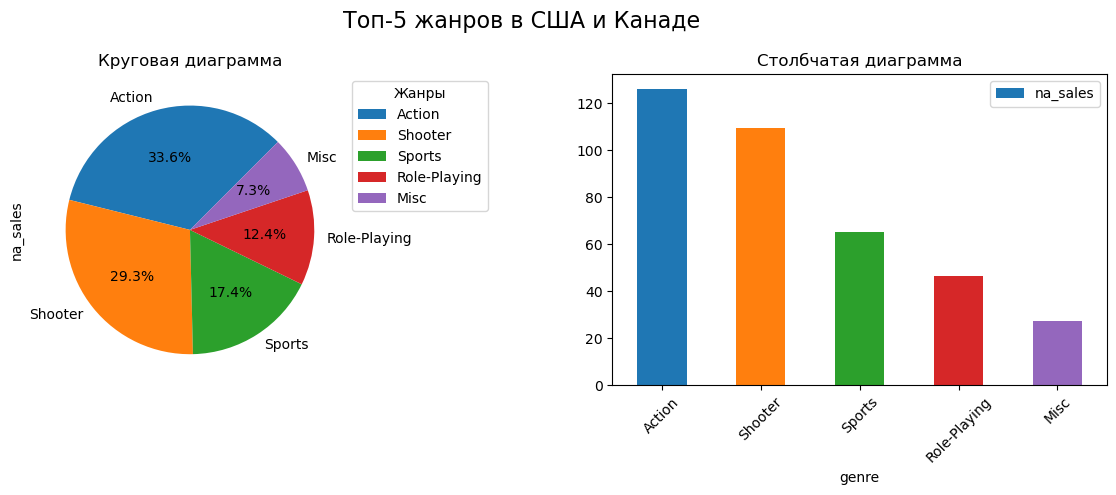

In [106]:
#создаем фигуру с двумя графиками рядом
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#укажем цвета для каждой платформы
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

#первый график (круговая диаграмма)
na_genres.plot(kind='pie', y='na_sales',  labels=na_genres['genre'],autopct='%1.1f%%', ax=axes[0], colors=colors, startangle=45)
#startangle=45 меняет расположение подписей долей на графике
axes[0].set_title('Круговая диаграмма')

#второй график (столбчатая диаграмма)
na_genres.plot(kind='bar', x='genre', y='na_sales', ax=axes[1], color=colors, rot=45)
axes[1].set_title('Столбчатая диаграмма')

#выносим легенду графика pie за график, чтобы не перекрывала значения
legend = axes[0].legend(title="Жанры", loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

#общее название для обоих графиков
fig.suptitle('Топ-5 жанров в США и Канаде', fontsize=16)

#регулировка расстояния между графиками
plt.tight_layout()

plt.show()

#### Определим топ-5 для европейских пользователей

In [109]:
#Создадим сводную таблицу по жанру и количеству с суммой продаж в Европе.
eu_genres = df_13.pivot_table(\
                            index='genre',
                            values='eu_sales',
                            aggfunc='sum')
#Сортируем по убыванию и выводим первые пять.
eu_genres = eu_genres.sort_values(by='eu_sales', ascending=False).reset_index().head()
eu_genres

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


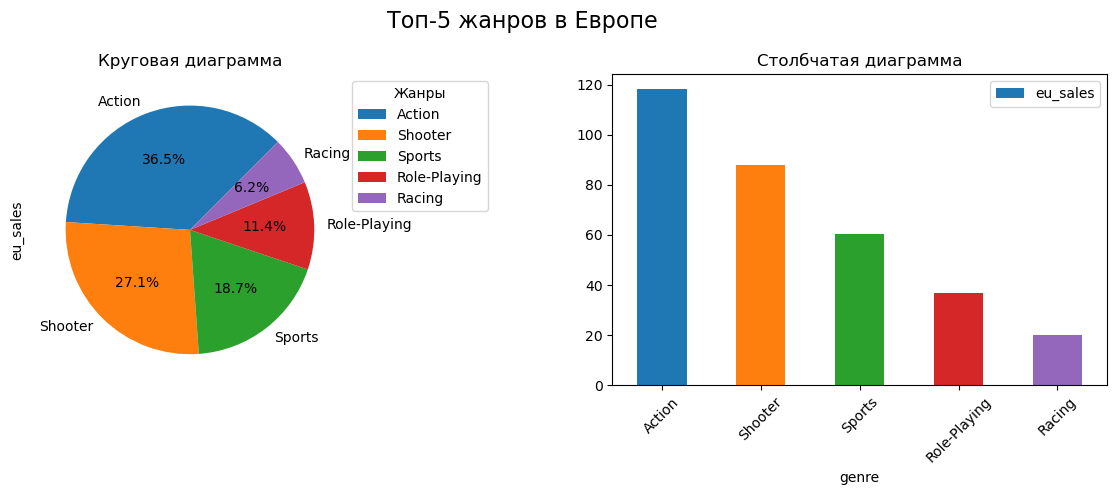

In [123]:
#создаем фигуру с двумя графиками рядом
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#укажем цвета для каждой платформы
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

#первый график (круговая диаграмма)
eu_genres.plot(kind='pie', y='eu_sales',  labels=eu_genres['genre'],autopct='%1.1f%%', ax=axes[0], colors=colors,
               startangle=45)
#startangle=45 меняет расположение подписей долей на графике
axes[0].set_title('Круговая диаграмма')

#второй график (столбчатая диаграмма)
eu_genres.plot(kind='bar', x='genre', y='eu_sales', ax=axes[1], color=colors, rot=45)
axes[1].set_title('Столбчатая диаграмма')

#выносим легенду графика pie за график, чтобы не перекрывала значения
legend = axes[0].legend(title="Жанры", loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

#общее название для обоих графиков
fig.suptitle('Топ-5 жанров в Европе', fontsize=16)

#регулировка расстояния между графиками
plt.tight_layout()

plt.show()

#### Определим топ-5 для японских пользователей

In [112]:
#Создадим сводную таблицу по жанру и количеству с суммой продаж в Японии.
jp_genres = df_13.pivot_table(\
                            index='genre',
                            values='jp_sales',
                            aggfunc='sum')
#Сортируем по убыванию и выводим первые пять.
jp_genres = jp_genres.sort_values(by='jp_sales', ascending=False).reset_index().head()
jp_genres

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


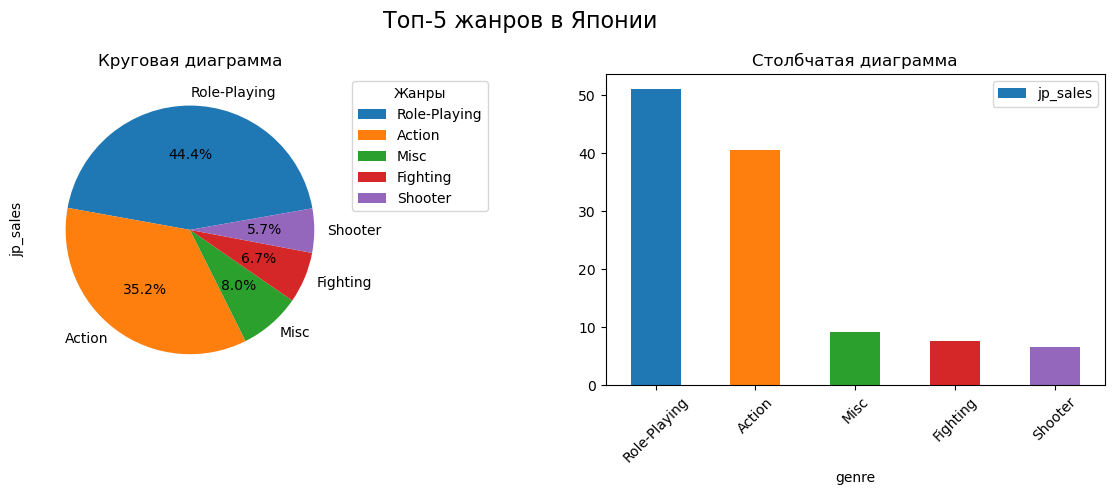

In [117]:
#создаем фигуру с двумя графиками рядом
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#укажем цвета для каждой платформы
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

#первый график (круговая диаграмма)
jp_genres.plot(kind='pie', y='jp_sales',  labels=jp_genres['genre'],autopct='%1.1f%%', ax=axes[0], colors=colors,
               startangle=10)
#startangle=45 меняет расположение подписей долей на графике
axes[0].set_title('Круговая диаграмма')

#второй график (столбчатая диаграмма)
jp_genres.plot(kind='bar', x='genre', y='jp_sales', ax=axes[1], color=colors, rot=45)
axes[1].set_title('Столбчатая диаграмма')

#выносим легенду графика pie за график, чтобы не перекрывала значения
legend = axes[0].legend(title="Жанры", loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

#общее название для обоих графиков
fig.suptitle('Топ-5 жанров в Японии', fontsize=16)

#регулировка расстояния между графиками
plt.tight_layout()

plt.show()

#### <span style="color: blue">Вывод по Топ-5 жанрам в трех регионах:
________________________________________________________________________________________________________________________________

По жанровым предпочтениям Северная Америка, далее СА и Европа по первым четырем местам абсолютно повторяют друг-друга по жанрам и минимально расходятся в долях:
- лидирует жанр `Action`с долями 34% (СА) и 36% (Европа),
- сразу за ними идет `Shooter` с долями 29% (СА) и 27% (Европа),
- затем жанр `Sports`с долями 17% (СА) и 19% (Европа),
- четвертую строчку занимает жанр `Role-Playing` с долями 12% (СА) и 11% (Европа).
- И лишь в последнем, самом незначительном по занимаемой доле сегменте данные регионы разделились:
    - в СА 7% рынка занимает жанр `Misc`, вероятно, это просто разные игры без конкретной жанровой привязки,
    - в Европе 6% захватил жанр `Racing`, что, возможно, объясняется более серьезными ограничениями на максимальную скорость на дорогах Европы, более высокими штрафами и жестким контролем за соблюдением этих правил.
    
В СА и Европе Топ-5 жанров распределены довольно равномерно и имеют геометрическое распределение. 

В Японии два основных лидера `Role-Playing` и `Action` захватили 79% рынка страны восходящего Солнца! В то время как жанры `Misc`, `Fighting` и `Shooter` делят жалкие "крохи" в 8%, 7%, 6% соответственно.

Если смотреть суммарно по всем трем регионам, то жанр `Action` практически везде занимает долю в 35%, что говорит о стабильной популярности данного жанра во всех трех регионах, и если наш магазин "Стримчик" захочет заняться разработкой игр, то стоит начать с игры именно в жанре `Action`)))
________________________________________________________________________________________________________________________________

## Выясним влияние рейтинга ESRB на продажи в каждом отдельном регионе

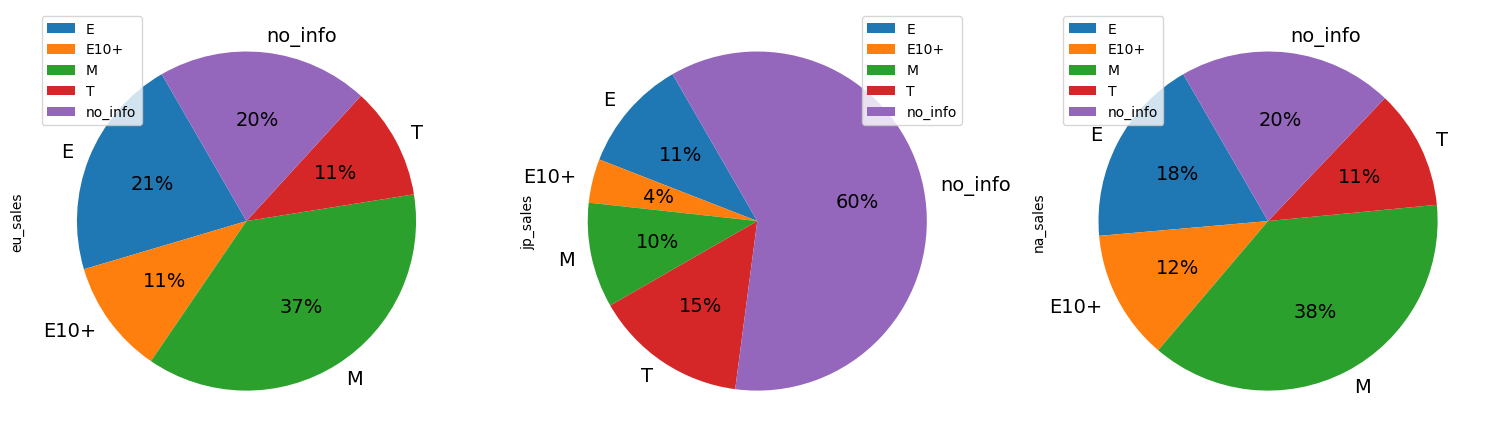

In [143]:
#Делаем сводную таблицу по рейтингу и продажам.
rating = df_13.pivot_table(index='rating',
                             values=['na_sales', 'eu_sales', 'jp_sales'],
                             aggfunc='sum') 

rating.plot(kind='pie', subplots=True, autopct='%1.f%%', figsize=(15, 5), fontsize=14, startangle=120)

plt.tight_layout()
plt.show()


<span style="color: blue">Упрощенная расшифровка значений рейтинга ESRB:
- `EC` - Ранее детство
- `E` - Все
- `Е 10+` - Все 10+
- `T` - Подросток
- `M` - Зрелые
- `A` - Взрослый
- `RP` - Ожидается рейтинг


### <span style="color: blue">Вывод о влиянии рйтинга на продажи в регионах:
________________________________________________________________________________________________________________________________

По графикам зависимости продаж от рейтинга видно, что в Европе и Северной Америке (далее СА) преобладают игры с рейтингом `M` – "зрелые". Далее в примерно одинаковом соотношении идут игры с рейтингом `E`("все") и `no_ifo`. За ними следуют также с примерным соотношением игры с рейтингом `E10+`("все 10+") и `T`("подростки"). В целом, можно сказать, что влияние рейтингов на продажи игр в Европе и СА практически идентичное.

В Японии основную долю продаваемых игр 60% составляют игры без рейтинга, что может говорить о том, что там продается много локальных игр, которые не продаются в других регионах, либо о своей системе рейтингов. Также в Японии продажи игр с рейтингом `T` выше, чем в других регионах, то есть больше востребованы игры для подростков.
________________________________________________________________________________________________________________________________

## Проверка гипотез

### Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H_0: Средний рейтинг Xbox = средний рейтинг PC

H_a: Средний рейтинг Xbox != средний рейтинг PC

alpha = 0.05

In [145]:
rating_platform = df_13.pivot_table(index=['platform', 'rating'],
                                    values=['na_sales', 'eu_sales', 'jp_sales'],
                                    aggfunc='mean')

#считаем средний рейтинг платформ в регионах
rating_pc = rating_platform.query('platform == "PC"')
array1 = rating_pc.mean()
print(array1)
rating_xone = rating_platform.query('platform == "XOne"')
array2 = rating_xone.mean()
print(array2)

eu_sales    0.135708
jp_sales    0.000000
na_sales    0.055513
dtype: float64
eu_sales    0.192831
jp_sales    0.001228
na_sales    0.349225
dtype: float64


In [146]:
# results = вызов метода для проверки гипотезы 
results = st.ttest_ind(array1, array2, equal_var = False)
alpha = 0.05
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.36784463464072065
Не получилось отвергнуть нулевую гипотезу


#### <span style="color: blue">Вывод по проверке первой гипотезы:
________________________________________________________________________________________________________________________________    
После проверки нулевой гипотезы методом **ind**, выяснилось, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые. Данный метод использовался, потому что мы сравниваем две генеральные выборки, которые не зависят друг от друга.
________________________________________________________________________________________________________________________________

### Гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports разные.

H_0: Средний рейтинг Action = средний рейтинг Sports

H_a: Средний рейтинг Action != средний рейтинг Sports

alpha = 0.05

In [147]:
rating_genres = df_13.pivot_table(index=['genre', 'rating'],
                                 values=['na_sales', 'eu_sales', 'jp_sales'],
                                 aggfunc='mean')
rating_action = rating_genres.query('genre == "Action"')
array3 = rating_action.mean()
print('Средний рейтинг жанра "Action" составляет:')
print(array3)
rating_sports = rating_genres.query('genre == "Sports"')
array4 = rating_sports.mean()
print()
print('Средний рейтинг жанра "Sports" составляет:')
print(array4)

Средний рейтинг жанра "Action" составляет:
eu_sales    0.169113
jp_sales    0.047458
na_sales    0.182625
dtype: float64

Средний рейтинг жанра "Sports" составляет:
eu_sales    0.196071
jp_sales    0.023329
na_sales    0.295800
dtype: float64


In [148]:
# results = вызов метода для проверки гипотезы 
results = st.ttest_ind(array3, array4, equal_var = False)
alpha = 0.05
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.6971993006541242
Отвергаем нулевую гипотезу


#### <span style="color: blue">Вывод по проверке второй гипотезы: 
________________________________________________________________________________________________________________________________
После проверки нулевой гипотезы методом ind, выяснилось, что средние пользовательские рейтинги платформ `Action` и `Sports` разные. Данный метод использовался, потому что мы сравниваем две генеральные выборки, которые не зависят друг от друга.
________________________________________________________________________________________________________________________________

## <span style="color: red">Итоговый вывод по результатам исследования


    
- В результате исследования данных с продажами игр за 37 лет (с 1980 по 2016 годы) удалось выяснить, что до 1994 года рост выпуска игр был незначительным. В 1994 году объем выпущенных игр увеличился вдвое по сравнению с предыдущим годом. Наиболее результативными по выпущенным играм были 2007-2008 годы.


- Также в результате исследования удалось выяснить среднее время жизни одной платформы (10 лет) и среднее время для достижения пика продаж для отдельной платформы(3.5 года). Данное знание, помогло нам вычислить актуальный период и спрогнозировать продажи на 2017! Наиболее выгодной по ожидаемым продажам в 2017 году оказалась платформа `PS4`, за ней следуют платформы `XOne` и `PC`.


- Далее мы выяснили, что оценки критиков имеют незначительное влияние на продажи перспективных в 2017 году платформ, а влияние пользователей и вовсе отсутствует. Исходя из этого, рекомендую магазину "Стримчик" пересмотреть свои бюджеты на рекламную кампанию 2017 года. Расходы на критиков можно существенно сократить. А сэкономленные деньги ~~прогулять~~ направить на другие направления продвижения продукта)))


- Затем удалось выяснить, что абсолютный лидер по количеству проданных игр — жанр `Shooter`. Также в 2017 году стоит внимательно следить за предложением игр жанра `Platform`, поскольку по продажам данный жанр занимает 3 место, а по количеству выпущенных ранее игр лишь 9. То есть игр жанра `Platform` выпускают мало, а денег они приносят много, поэтому стоит стремиться к заключению эксклюзивных контрактов на продажу с производителями игр данног жанра.


- Также мы выяснили топ-5 платформ и жанров для регионов Северная Америка, Европа, Япония. По полученным результатам удалось установить, что в Северной Америке довольно хорошо продаются приставки от *Microsoft*, в Японии же их совсем нет в топ-5! В Японии доминируют мобильные платформы, тогда как в Европе и Северной Америке преобладают домашние консоли, что говорит о том, что японцы предпочитают играть вне дома, в пути или в транспорте. Также в Европе и Северной Америке совпадают жанровые предпочтения – на первом месте жанр `Action`, который во всех регионах имеет долю не ниже 34%.


- Влияние рейтинга на продажи оказалось примерно идентичным для Сев.Америки и Европы.


- В целом можно заключить, что по многим признакам и характеристикам рынки Сев. Америки и Европы похожи, и для них можно строить  единую концепцию продаж. Для них идеально будет продвигать игры в жанре `Shooter` с рейтингом `M` на платформе `PS4`.


- Тогда как в Японии рынок игр имеет свои уникальные черты и особенности, и для выхода на этот специфический рынок надо учесть много локальных нюансов. Но примерный образец для завоевания рынка Японии выглядит следующим образом: игра в жанре `Role-Playing` без рейтинга , выпущенная на платформе `3DS`.